In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,LSTM,Bidirectional,RepeatVector,TimeDistributed
import time
from keras.models import load_model

In [48]:
def rmse(pred,actual):
    error = np.subtract(pred,actual)
    sqerror = np.sum(np.square(error))/actual.shape[0]
    return np.sqrt(sqerror)

In [137]:
df = pd.read_csv("test_10-20.csv",index_col=0)
df = df.values
# df

In [50]:
n_steps_in, n_steps_out = 10, 20

In [51]:
x_test = df[:,0:n_steps_in]
y_test = df[:,n_steps_in: n_steps_in + n_steps_out]

In [76]:
name = "IPR"
num_exp = 1 
epochs= 100
hidden=10

test_acc = np.zeros(num_exp)
step_rmse = np.zeros([num_exp, n_steps_out])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [53]:
n_features =1 

In [54]:
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],n_features))
x_test.shape

(8134, 10, 1)

In [68]:
y_test = y_test.reshape((y_test.shape[0] , y_test.shape[1] , n_features))
y_test.shape

(8134, 20, 1)

In [57]:
model = load_model('load_model.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 repeat_vector (RepeatVecto  (None, 20, 10)            0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 20, 10)            840       
                                                                 
 time_distributed (TimeDist  (None, 20, 10)            110       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 20, 1)             11        
 stributed)                                                      
                                                        

In [69]:
st = time.time()
y_pred = model.predict(x_test)
et = time.time()

255/255 [==============================] - 0s 1ms/step


In [85]:
y_pred

array([[[0.27173275],
        [0.29990935],
        [0.3060056 ],
        ...,
        [0.2447594 ],
        [0.24286829],
        [0.24127431]],

       [[0.27216172],
        [0.30045098],
        [0.30661666],
        ...,
        [0.24597754],
        [0.24410696],
        [0.24253173]],

       [[0.2715758 ],
        [0.29965836],
        [0.30566674],
        ...,
        [0.24316274],
        [0.24120615],
        [0.23954879]],

       ...,

       [[0.26239866],
        [0.28657234],
        [0.28966302],
        ...,
        [0.18711506],
        [0.18545046],
        [0.1846379 ]],

       [[0.2517299 ],
        [0.27329692],
        [0.27600622],
        ...,
        [0.16768181],
        [0.16772197],
        [0.16818243]],

       [[0.24707685],
        [0.26845074],
        [0.27085674],
        ...,
        [0.16256407],
        [0.1627298 ],
        [0.16329494]]], dtype=float32)

In [59]:
aa = time.time()
print(aa)
bb = time.time()
print(bb)

1704963628.0313647
1704963628.0313647


In [94]:
tt = et - st
tt

0.7233500480651855

In [71]:
y_test.shape

(8134, 20, 1)

In [74]:
# print(y_test.shape)
test_acc[0] = rmse(y_pred,y_test)
test_acc[0]

0.3829922027184257

In [127]:
best_rmse =  test_acc[0]
best_predict_test = y_pred

In [126]:
for j in range(n_steps_out):
    step_rmse[0][j] = rmse(y_pred[:,j,0] , y_test[:,j,0])
    print(step_rmse[0][j])
    print(y_test[:,j,0])

0.061271379616017856
[0.32863072 0.32863072 0.33736798 ... 0.3189374  0.31817877 0.31817877]
0.04227369756812295
[0.32863072 0.33736798 0.33736798 ... 0.31817877 0.31817877 0.31992063]
0.04269504412489004
[0.33736798 0.33736798 0.3102282  ... 0.31817877 0.31992063 0.31992063]
0.04730867353494109
[0.33736798 0.3102282  0.3102282  ... 0.31992063 0.31992063 0.3038786 ]
0.05306155902061195
[0.3102282  0.3102282  0.32441607 ... 0.31992063 0.3038786  0.3038786 ]
0.05939170348870488
[0.3102282  0.32441607 0.32441607 ... 0.3038786  0.3038786  0.33062482]
0.06598645221728693
[0.32441607 0.32441607 0.32059544 ... 0.3038786  0.33062482 0.33062482]
0.07206090478787394
[0.32441607 0.32059544 0.32059544 ... 0.33062482 0.33062482 0.29688272]
0.07696432469687282
[0.32059544 0.32059544 0.32697266 ... 0.33062482 0.29688272 0.29688272]
0.0820743641964656
[0.32059544 0.32697266 0.32697266 ... 0.29688272 0.29688272 0.32733816]
0.08802592975723567
[0.32697266 0.32697266 0.31595916 ... 0.29688272 0.32733816 

In [128]:
best_predict_test.reshape(y_test.shape[0],y_test.shape[1])

array([[0.27173275, 0.29990935, 0.3060056 , ..., 0.2447594 , 0.24286829,
        0.24127431],
       [0.27216172, 0.30045098, 0.30661666, ..., 0.24597754, 0.24410696,
        0.24253173],
       [0.2715758 , 0.29965836, 0.30566674, ..., 0.24316274, 0.24120615,
        0.23954879],
       ...,
       [0.26239866, 0.28657234, 0.28966302, ..., 0.18711506, 0.18545046,
        0.1846379 ],
       [0.2517299 , 0.27329692, 0.27600622, ..., 0.16768181, 0.16772197,
        0.16818243],
       [0.24707685, 0.26845074, 0.27085674, ..., 0.16256407, 0.1627298 ,
        0.16329494]], dtype=float32)

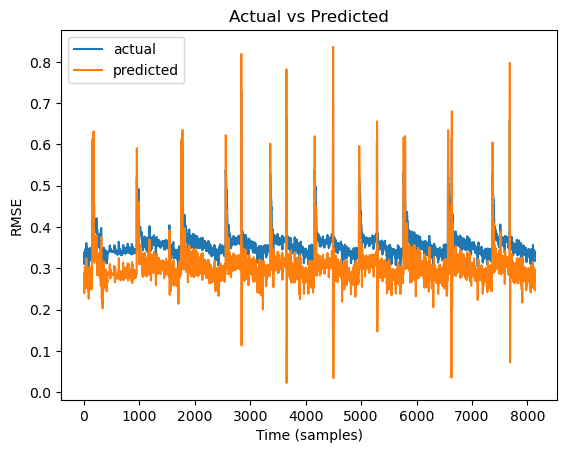

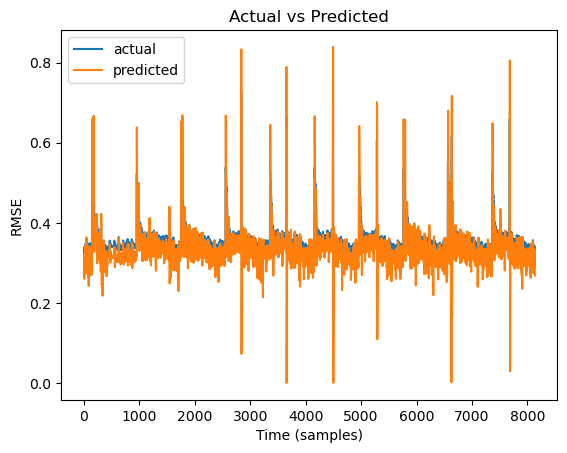

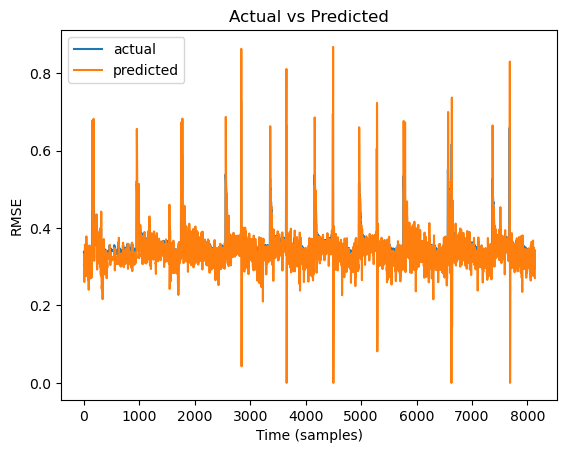

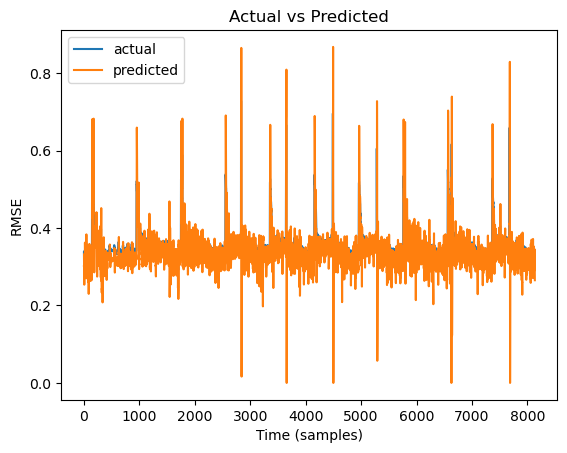

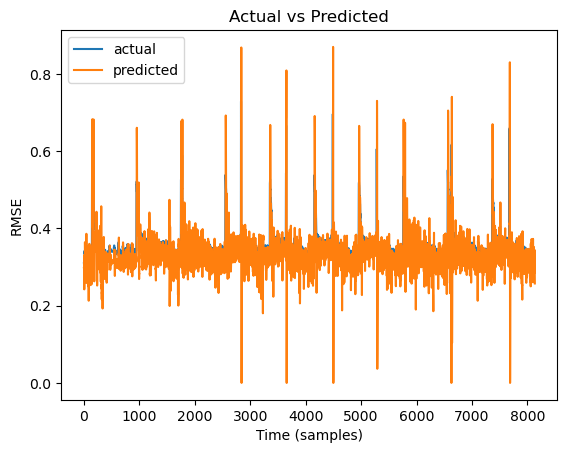

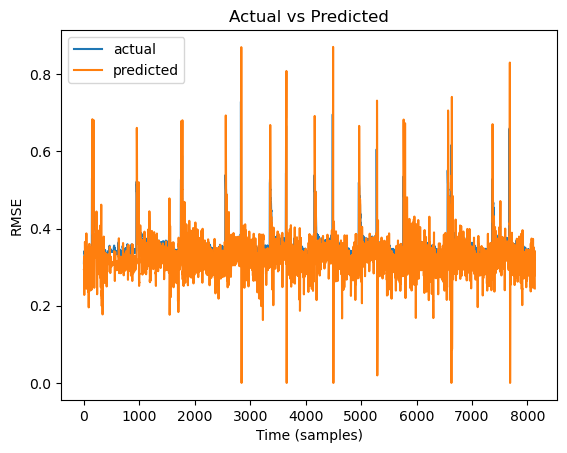

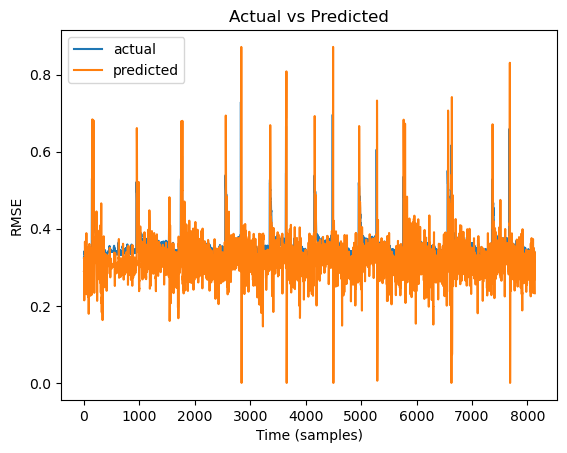

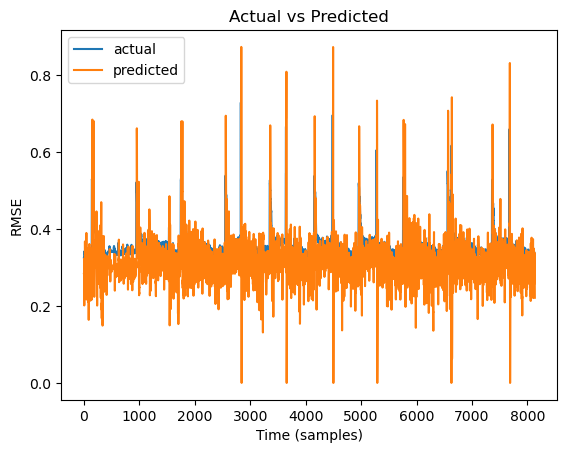

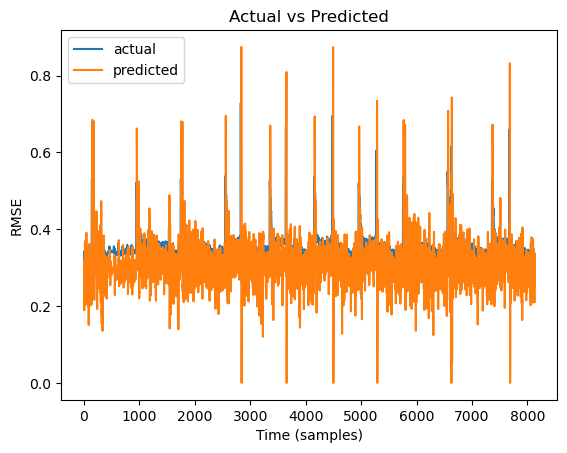

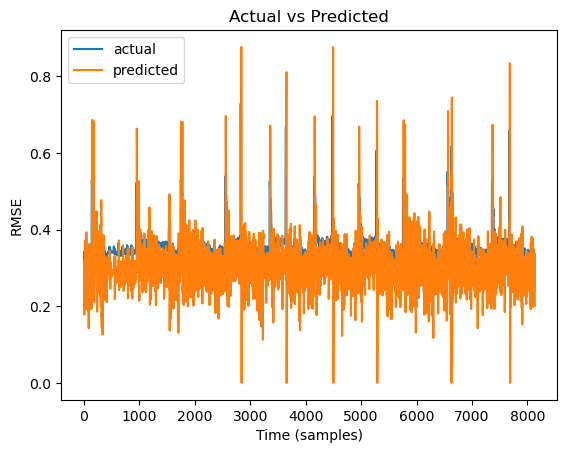

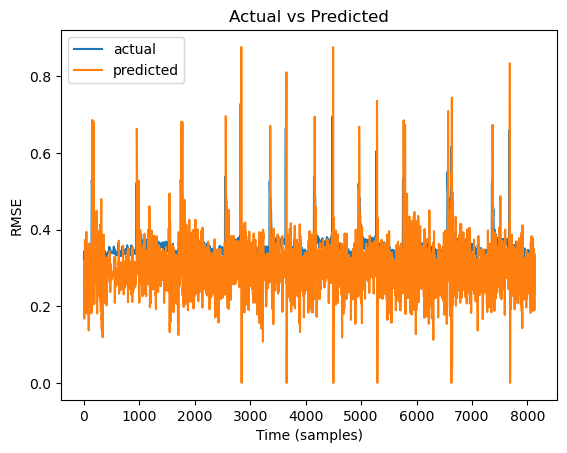

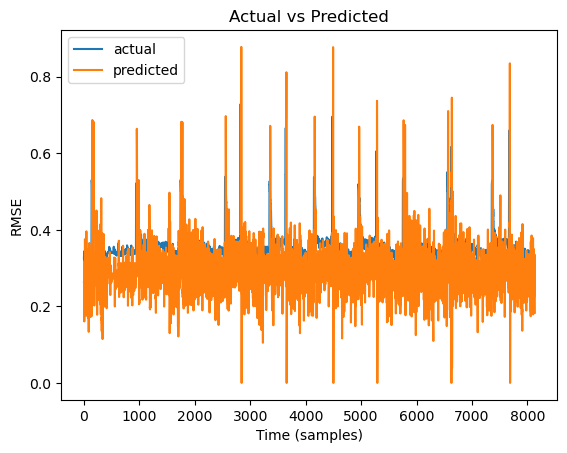

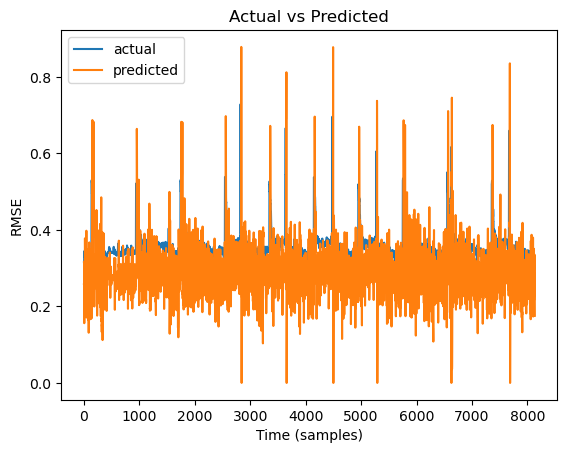

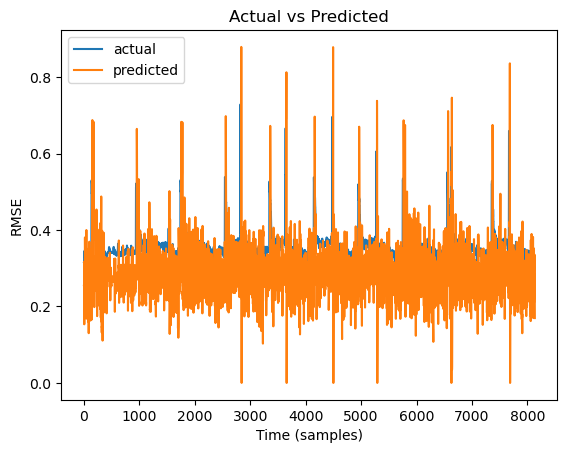

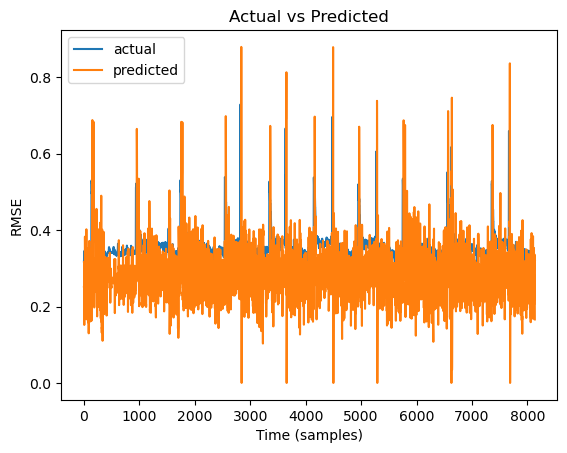

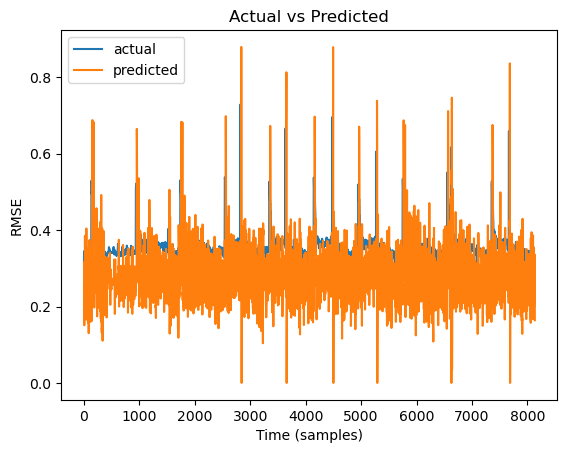

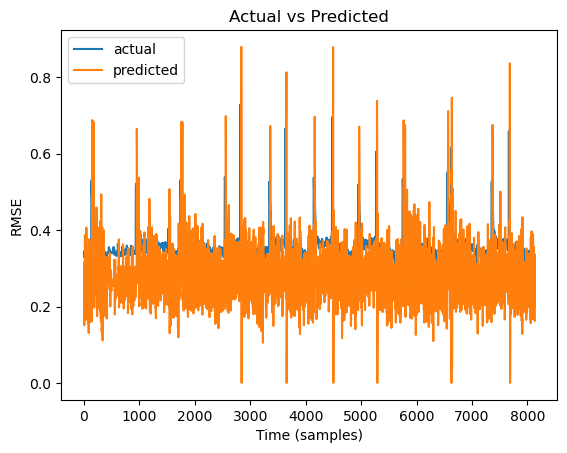

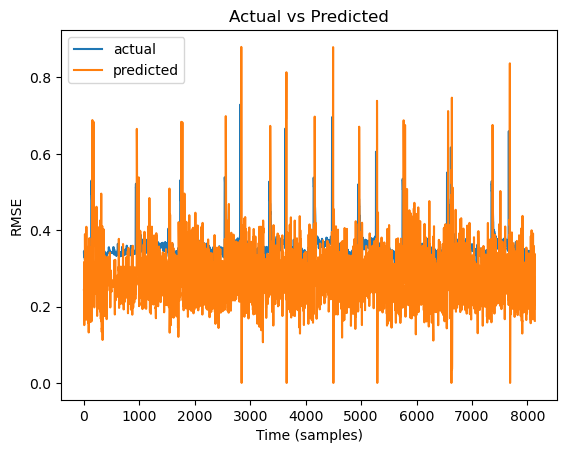

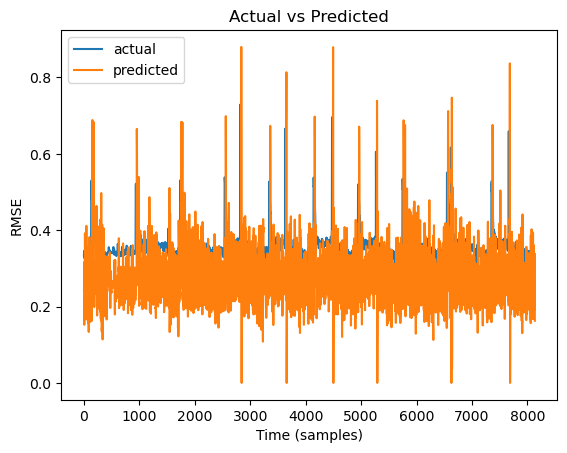

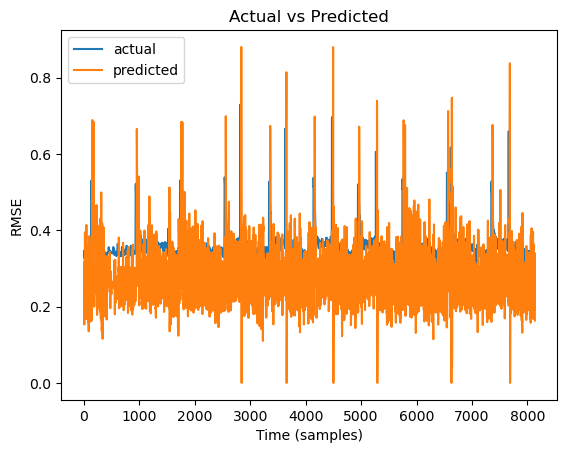

In [129]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
for j in range(n_steps_out):
    plt.figure()
    plt.plot(x_data, y_test[:,j], label='actual')
    plt.plot(x_data, best_predict_test[:,j], label='predicted')
    plt.ylabel('RMSE')
    plt.xlabel('Time (samples)')
    plt.title('Actual vs Predicted')
    plt.legend()
    plt.show()
    plt.close()

In [130]:
a = best_predict_test.reshape(y_test.shape[0],y_test.shape[1])
a.shape

(8134, 20)

In [132]:
list1 = []
for i in range(len(a[0])):
    list1.append(a[0][i])

20
None


0.27173275

In [109]:
list1

[0.27173275,
 0.29990935,
 0.3060056,
 0.30312872,
 0.29915667,
 0.2946033,
 0.29010278,
 0.2851829,
 0.27897567,
 0.27333164,
 0.26821697,
 0.26359892,
 0.25944716,
 0.2557338,
 0.25243276,
 0.24951904,
 0.24696891,
 0.2447594,
 0.24286829,
 0.24127431]

In [135]:
b = df[:,5:15]

In [112]:
list2 = []
for i in range(len(b[0])):
    list2.append(b[0][i])

In [113]:
list2

[0.31123906,
 0.34149805,
 0.34149805,
 0.32486534,
 0.32486534,
 0.32863072,
 0.32863072,
 0.33736798,
 0.33736798,
 0.3102282]

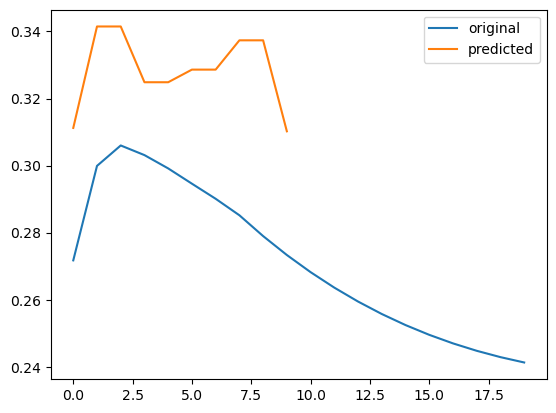

In [114]:
plt.plot(list1,label="original")
plt.plot(list2,label="predicted")
plt.legend()